# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [152]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git commit -m 'made a set of keywords 2019-2022'
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt
#!git commit -m 'added library fuzzywuzzy'
#!git push 

In [179]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import functools
import operator
import os
import os.path as op
import numpy as np
import pytrends
from pytrends.request import TrendReq as UTrendReq
from datetime import date
import datetime as d
from collections import Counter


In [154]:
GET_METHOD='get'


headers = {
    'authority': 'trends.google.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
    'content-type': 'application/json;charset=UTF-8',
    'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
    'origin': 'https://trends.google.com',
    'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-full-version': '"110.0.5481.177"',
    'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-platform-version': '"13.2.1"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
}


class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




In [155]:
# Opening JSON file
f = open('/home/marios/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

### Keywords exploration

In [9]:
df_subset.keywordStrings

60278                  [NASA, OSIRIS-REx, Bennu, asteroid]
60279    [English Channel, migration, boats, illegal im...
60280    [Brazil, Jair Bolsonaro, Chicago economics, Ha...
60281                     [Japan, Tokyo, Harajuku, attack]
60282    [Asia, Bangladesh, elections, Kamal Hossain, S...
60283    [Iran, sanctions, civil society, nuclear deal,...
60284    [Liviu Dragnea, Viorica Dancila, Klaus Iohanni...
60285    [counterfeit alcohol, adulterated alcohol, fak...
60286    [Edgar Hilsenrath, Schriftsteller, Jude, Der N...
60287      [Indonesia, Java, landslide, natural disasters]
Name: keywordStrings, dtype: object

In [12]:
df_subset.keywordStrings
kw_flat = functools.reduce(operator.add, df_subset.keywordStrings)

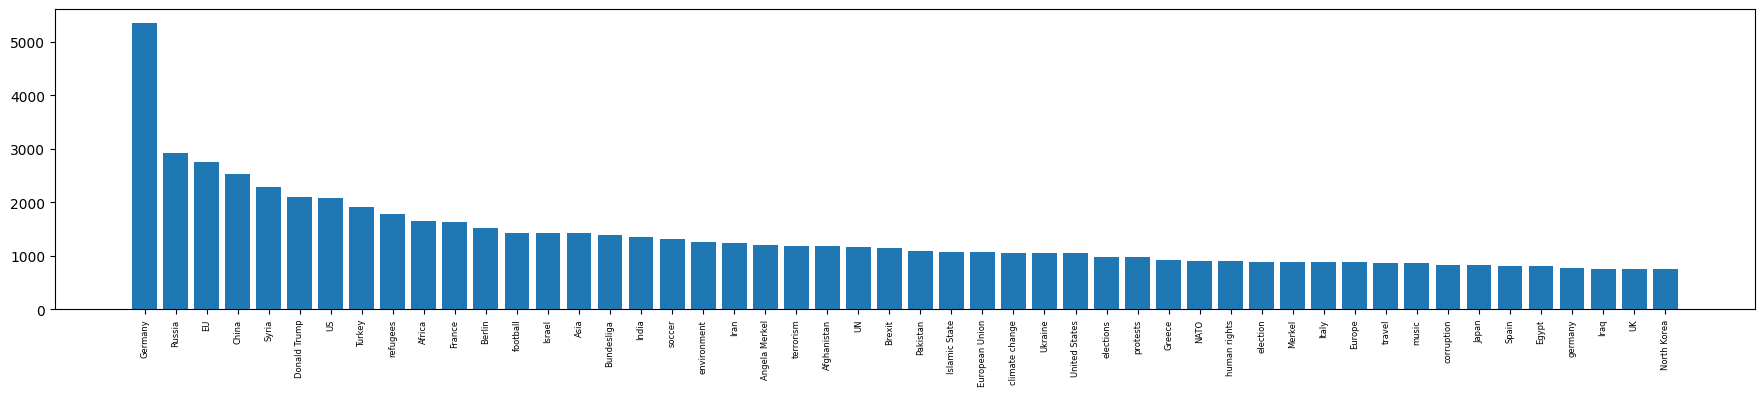

In [15]:
from collections import Counter

freq_kwords = Counter(kw_flat).most_common(50)
x, y = zip(*freq_kwords)

fig = plt.figure(figsize=(17,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xticks(fontsize=6, rotation=90)
plt.show()

In [22]:
output_dir = '/home/marios/S2DS/Spring23_DW/data/processed'
file_name = 'flat_keywords_2019.npy'

np.save(op.join(output_dir, file_name), kw_flat)

In [24]:
kw_flat.count('Angela Merkel')

1206

## Angela Analysis

In [358]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2019-01-01 2023-01-01')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')


In [390]:
#let's get timeseries from all Angela Merkel mentions 
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)

df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)
df_angela['date_month'] = df_angela['date_month'].apply(lambda x: int(x.replace('-','')))
all_year_months = [year*100+month for month in range(1, 13) for year in range(2010, 2023)]

In [391]:
df_angela

,id,lastModifiedDate,keywordStrings,keywordStringsCleanAfterFuzz,date_month
185,2019-01-06T13:54:57.402Z,2019-01-06T13:54:57.402Z,"[Germany, cyber, hacking, Angela Merkel, AfD]","[germany, cyber, hacking, angela merkel, afd]",201901
213,2019-01-07T13:25:08.879Z,2019-01-07T13:25:08.879Z,"[Germany, data breach, cyber, hacking, Angela ...","[germany, data breach, cyber, hacking, angela ...",201901
237,2019-01-08T08:38:56.012Z,2019-01-08T08:38:56.012Z,"[hacking, leak, politicians, media, Angela Mer...","[hacking, leak, politicians, media, angela mer...",201901
305,2019-01-10T06:52:20.936Z,2019-01-10T06:52:20.936Z,"[Germany, Gerd Müller, German Federal Ministry...","[germany, gerd müller, zambia, malawi, namibia...",201901
340,2019-01-10T18:55:05.477Z,2019-01-10T18:55:05.477Z,"[Christian Democratic Union, Friedrich Merz, A...","[christian democratic union, friedrich merz, a...",201901
...,...,...,...,...,...
33340,2021-12-16T21:22:41.980Z,2021-12-16T21:22:41.980Z,"[Germany, arms exports, Angela Merkel, Egypt, ...","[germany, arms exports, angela merkel, egypt, ...",202112
33372,2021-12-17T14:42:43.270Z,2021-12-17T14:42:43.270Z,"[Friedrich Merz, CDU, Angela Merkel]","[friedrich merz, cdu, angela merkel]",202112
33384,2021-12-17T22:31:35.705Z,2021-12-17T22:31:35.705Z,"[CDU, Angela Merkel, Armin Laschet, Markus Söd...","[cdu, angela merkel, armin laschet, markus söd...",202112
33618,2021-12-25T18:07:11.555Z,2021-12-25T18:07:11.555Z,"[coronavirus, COVID-19, COVID, pandemic, Frank...","[coronavirus, covid-19, covid, pandemic, frank...",202112


In [163]:
not_in_df = list(set(all_year_months) - set(df_angela['date_month'].tolist()))
yearmonth_counts = dict(Counter(df_angela['date_month'].tolist()))
for key_ in not_in_df:
    yearmonth_counts[key_] = 0 

In [164]:
yearmonth_counts.keys()
df_yearmonth_counts = pd.DataFrame.from_dict(yearmonth_counts, orient='index', columns=['val'])
df_yearmonth_counts['month_str'] = [str(i) for i in df_yearmonth_counts.index]
df_yearmonth_counts = df_yearmonth_counts.sort_values(by='month_str')


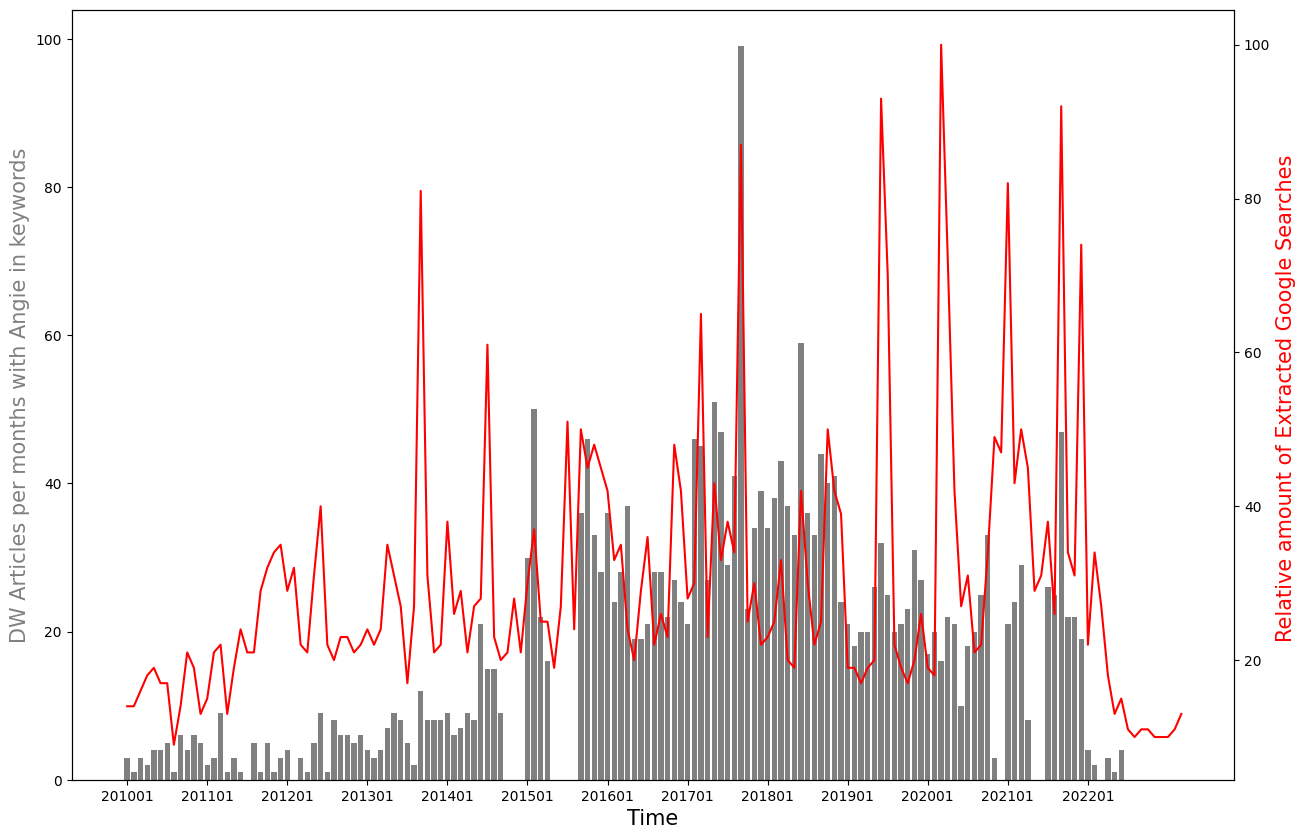

In [165]:
fig,ax = plt.subplots(figsize = (15,10))
ax.bar(df_yearmonth_counts['month_str'], df_yearmonth_counts.val, color = 'grey')
ax.set_xticks(df_yearmonth_counts['month_str'][::12], rotate = 60)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('DW Articles per months with Angie in keywords', color = 'grey', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(np.arange(0,len(angie_does_google.values)), angie_does_google.values, color = 'r')
ax2.set_ylabel('Relative amount of Extracted Google Searches ', color = 'r', fontsize = 15)
# save it
output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
file_name = 'Angela_Merkel_and_DW_a_love_story.pdf'
fig.savefig(op.join(output_dir,file_name))
plt.show()


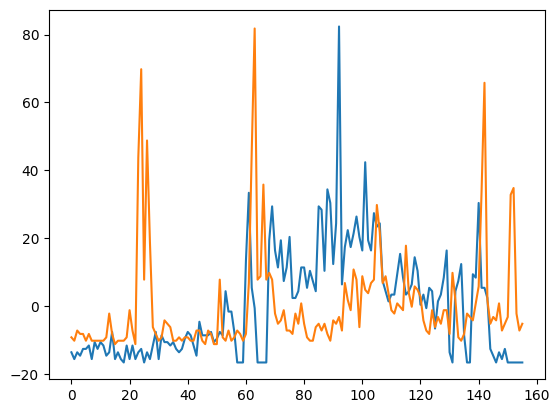

In [441]:
size = df_yearmonth_counts.val.values.shape[0]
dw = df_yearmonth_counts.val.values
google = angie_does_google[:size]['Angela Merkel'].values

#let's subtract the meean from each signal 
dw_submean = dw-np.mean(dw)
google_submean = google-np.mean(google)

plt.plot(dw_submean)
plt.plot(google_submean)

In [444]:
#!pip3 install statsmodels
from statsmodels.tsa.stattools import grangercausalitytests

mix_df = pd.DataFrame({'dw':dw, 'google': google})
gc_res = grangercausalitytests(mix_df, 5)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4959  , p=0.4824  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=0.5057  , p=0.4770  , df=1
likelihood ratio test: chi2=0.5048  , p=0.4774  , df=1
parameter F test:         F=0.4959  , p=0.4824  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4954  , p=0.6103  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=1.0242  , p=0.5993  , df=2
likelihood ratio test: chi2=1.0208  , p=0.6003  , df=2
parameter F test:         F=0.4954  , p=0.6103  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8696  , p=0.4584  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=2.7340  , p=0.4345  , df=3
likelihood ratio test: chi2=2.7098  , p=0.4386  , df=3
parameter F test:         F=0.8696  , p=0.4584  , df_denom=146, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6868  , p=0.6022  

In [440]:
gc_res

{1: ({'ssr_ftest': (4.154468397386545, 0.04325835792506348, 152.0, 1),
   'ssr_chi2test': (4.236464484177068, 0.039564476557942985, 1),
   'lrtest': (4.179602672294095, 0.04091329140351025, 1),
   'params_ftest': (4.154468397386521, 0.04325835792506408, 152.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.6543597467831126, 0.07366940783559665, 149.0, 2),
   'ssr_chi2test': (5.486864443014756, 0.06434910704908488, 2),
   'lrtest': (5.391380121927114, 0.06749578949078333, 2),
   'params_ftest': (2.654359746783129, 0.07366940783559608, 149.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.8789760983549109, 0.13569840312228643, 146.0, 3),
   'ssr_chi2test': (5.907191980444548, 0.11621388342631263, 3),
   'lrtest': (5.796009062540179, 0.1219677758060092, 3),
   'params_ftest': (1.8789760983549237, 0.13569840312228593, 146.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

## TESTING VARIOUS THINGS: PLEASE IGNORE 

In [45]:
df_angela.sort_values(by='id').sort_index()

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,date_month
0,55250,5070917,EU presidency power-sharing takes effect,EU shake-up,"<p>The Lisbon Treaty, which came into force at...",Spain takes over the European Union's rotating...,Spain is taking over the EU presidency just as...,None,[],"[{'name': 'Lisbon Treaty'}, {'name': 'European...",...,[{'name': 'Sweden wraps up six months in EU pr...,False,[],"[{'id': 28158946}, {'id': 28158947}, {'id': 28...",{'description': 'Lisbon Treaty: simplifying or...,"[{'name': 'Symbolbild Europa Fragezeichen'}, {...",[],False,None,201001
375,55625,5136869,Germany's Merkel meets coalition partners to e...,Soothing tensions,<p>Merkel met with her foreign minister and le...,German Chancellor Angela Merkel met her coalit...,German Chancellor Merkel met coalition partner...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Guido We...",...,[{'name': 'CSU rejects Foreign Minister Wester...,False,[],"[{'id': 28181369}, {'id': 28181370}, {'id': 28...",{'description': 'The ruling coalition has suff...,[{'name': 'Deutschland Angela Merkel Bundestag...,[],False,None,201001
518,55768,5161088,Germany fine-tunes its stance on Afghanistan,Afghanistan conference,<p>Angela Merkel will sit down with Foreign Mi...,The German federal government plans a series o...,German ministers are preparing their strategy ...,None,[],"[{'name': 'Afghanistan'}, {'name': 'troop surg...",...,[{'name': 'Germany agrees to accelerate Afghan...,False,[],"[{'id': 28188959}, {'id': 28188960}, {'id': 28...","{'description': 'There are about 4,500 German ...",[{'name': 'Deutsche ISAF Soldaten kehren von e...,[],False,None,201001
734,55984,5199880,Merkel backs push to restart Mid-East peace talks,Merkel for Mid-East peace,"<p>At a press conference with Abbas, the chanc...",Chancellor Angela Merkel said on Monday that G...,Chancellor Merkel and Palestinian leader Abbas...,None,[],"[{'name': 'Mid-East'}, {'name': 'Middle East'}...",...,[{'name': 'Israeli president touches down in G...,False,[],"[{'id': 28200790}, {'id': 28200791}, {'id': 28...",{'description': 'Merkel called on Israel and t...,[{'name': 'Deutschland Palästinenser Mahmud Ab...,[],False,None,201002
1474,56724,5299788,Angela Merkel rules out German bailout for Greece,More measures needed,<p>The EU's top finance chief said Monday that...,Chancellor Merkel has taken a tough line on th...,The EU says Greece needs to do still more to b...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Greece'}...",...,[{'name': 'Plan for Germany to buy Greek bonds...,False,[],"[{'id': 28240889}, {'id': 28240890}, {'id': 28...","{'description': 'The EU may help Greece, but i...",[{'name': 'Symbolbild Griechenland Finanzen EU...,[],False,None,201003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174454,174470,61879431,War in Ukraine: Is Germany losing its EU leade...,Is Germany losing its EU leadership role?,"<p>A year ago, German Chancellor <a href=""/en/...",Germany has developed a credibility problem si...,Germany has lost credibility because of its hi...,,[{'name': 'Germany'}],"[{'name': 'Ukraine'}, {'name': 'Angela Merkel'...",...,[{'name': 'Chancellor Olaf Scholz tells German...,False,None,"[{'id': 61190955}, {'id': 61190957}, {'id': 61...",{'description': 'Chancellor Olaf Scholz's leve...,"[{'name': 'Rückreise Scholz'}, {'name': 'Deuts...",[{'name': 'Link to DW newsletter registration ...,False,ENGLISH,202205
174955,174996,62068960,Opinion: Merkel fails to show self-criticism o...,Merkel fails to show self-criticism over Russi...,"<figure class=""placeholder-image master_landsc...","For some Germans, Angela Merkel's first public...",DW's Anja Brockmann was disappointed by Angela...,,[],"[{'name': 'Angela Merkel'}, {'name': 'Ukraine'...",...,"[{'name': 'Angela Merkel opens up on Ukraine, ...",True,None,"[{'id

In [55]:
def get_dw_timeseries(df_clean, keyword, resolution = 'weekly', start = 2019, end = 2023):
    #TODO: check this function after replacing loop 
    
    not_keyword_indices = [] #TODO: do this without a loop (create extra boolean column and assign True if keyword is there)
    for i, row in enumerate(df_clean['keywordStrings']):
        if keyword not in row:
            not_keyword_indices.append(i)

    df_clean = df_clean.drop(not_keyword_indices)
    df_clean['datetimes']= pd.to_datetime(df_clean['lastModifiedDate'])
    df_clean['yearweek'] = df_clean['datetimes'].apply(lambda x: str(x.year)+str(x.week))

    all_weeks = [str(year)+str(week).zfill(2) for week in range(1, 53) for year in range(start, end)] #TODO is *100 here necessary?
    not_in_df = list(set(all_weeks) - set(df_clean['yearweek'].tolist()))
    dw_mentions = dict(Counter(df_clean['yearweek'].tolist()))
    for key_ in not_in_df:
        dw_mentions[key_] = 0 
    
    df_dw_mentions = pd.DataFrame.from_dict(dw_mentions, orient='index', columns=['val'])
    df_dw_mentions['week_str'] = [str(i) for i in df_dw_mentions.index]
    df_dw_mentions = df_dw_mentions.sort_values(by='week_str')

    return df_dw_mentions


In [335]:
get_dw_timeseries(df, 'Angela Merkel', resolution = 'weekly', start = 2019, end = 2023)

/home/marios/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


,val,week_str
201901,0,201901
201902,0,201902
201903,0,201903
201904,0,201904
201905,0,201905
...,...,...
202248,0,202248
202249,0,202249
202250,0,202250
202251,0,202251


In [327]:
filepath = '/home/marios/S2DS/Spring23_DW/data/interim/clean_keywords_2019-2021_after_RapidFuzz.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')
df

,id,lastModifiedDate,keywordStrings,keywordStringsCleanAfterFuzz
0,2019-01-01T03:57:28.904Z,2019-01-01T03:57:28.904Z,"[NASA, OSIRIS-REx, Bennu, asteroid]","[nasa, osiris-rex, bennu, asteroid]"
1,2019-01-01T06:11:50.527Z,2019-01-01T06:11:50.527Z,"[English Channel, migration, boats, illegal im...","[english channel, migration, boats, illegal im..."
2,2019-01-01T06:14:35.563Z,2019-01-01T06:14:35.563Z,"[Brazil, Jair Bolsonaro, Chicago economics, Ha...","[brazil, jair bolsonaro, chicago economics, ha..."
3,2019-01-01T08:26:11.599Z,2019-01-01T08:26:11.599Z,"[Japan, Tokyo, Harajuku, attack]","[japan, tokyo, harajuku, attack]"
4,2019-01-01T09:05:00.736Z,2019-01-01T09:05:00.736Z,"[Asia, Bangladesh, elections, Kamal Hossain, S...","[asia, bangladesh, elections, kamal hossain, s..."
...,...,...,...,...
33825,2021-12-31T19:06:43.423Z,2021-12-31T19:06:43.423Z,"[Germany, Olaf Scholz, New Year, New Year's ad...","[germany, olaf scholz, new year, new year's ad..."
33826,2021-12-31T20:27:51.092Z,2021-12-31T20:27:51.092Z,"[Colorado, wildfires, Boulder County, evacuati...","[colorado, wildfires, boulder county, evacuati..."
33827,2021-12-31T20:32:20.303Z,2021-12-31T20:32:20.303Z,"[RCEP, Regional Comprehensive Economic Partner...","[rcep, regional comprehensive economic partner..."
33828,2021-12-31T20:38:11.201Z,2021-12-31T20:38:11.201Z,"[France, birth control, contraception, contrac...","[france, birth control, contraception, contrac..."


In [331]:
type(df['keywordStringsCleanAfterFuzz'][0])



list

In [361]:
angie_does_google

,Angela Merkel
date,
2019-01-06,9
2019-01-13,8
2019-01-20,11
2019-01-27,10
2019-02-03,10
...,...
2022-12-04,5
2022-12-11,5
2022-12-18,5


In [342]:
df_ang_explode = df_angela.explode('keywordStringsCleanAfterFuzz')

In [348]:
df_ang_explode = df_ang_explode.loc[df_ang_explode['keywordStringsCleanAfterFuzz']== 'angela merkel']
df_ang_explode['lastModifiedDate'] = pd.to_datetime(df_ang_explode['lastModifiedDate'])
df_ang_explode['week'] = df_ang_explode['lastModifiedDate'].dt.week
df_ang_explode['year'] = df_ang_explode['lastModifiedDate'].dt.year

/home/marios/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [354]:
grouped_keys_times = df_ang_explode.groupby([df_ang_explode.year, df_ang_explode.week]).count().reset_index()

In [355]:
grouped_keys_times = grouped_keys_times.rename(columns={"id": "count"})
grouped_keys_times = grouped_keys_times.iloc[:,:3]

In [356]:
grouped_keys_times

,year,week,count
0,2019,1,6
1,2019,2,8
2,2019,3,2
3,2019,4,6
4,2019,5,6
...,...,...,...
130,2021,49,7
131,2021,50,3
132,2021,51,1
133,2021,52,1


In [357]:
grouped_keys_times['yearweek'] = pd.to_datetime(dict(year=grouped_keys_times.year, week=grouped_keys_times.week, day='01'))
grouped_keys_times.head()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [316]:
df_angela

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,date_month
lastModifiedDate,,,,,,,,,,,,,,,,,,,,,
2010-01-01 06:39:00+00:00,55250,5070917,EU presidency power-sharing takes effect,EU shake-up,"<p>The Lisbon Treaty, which came into force at...",Spain takes over the European Union's rotating...,Spain is taking over the EU presidency just as...,None,[],"[{'name': 'Lisbon Treaty'}, {'name': 'European...",...,[{'name': 'Sweden wraps up six months in EU pr...,False,[],"[{'id': 28158946}, {'id': 28158947}, {'id': 28...",{'description': 'Lisbon Treaty: simplifying or...,"[{'name': 'Symbolbild Europa Fragezeichen'}, {...",[],False,None,201001
2010-01-17 20:12:16+00:00,55625,5136869,Germany's Merkel meets coalition partners to e...,Soothing tensions,<p>Merkel met with her foreign minister and le...,German Chancellor Angela Merkel met her coalit...,German Chancellor Merkel met coalition partner...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Guido We...",...,[{'name': 'CSU rejects Foreign Minister Wester...,False,[],"[{'id': 28181369}, {'id': 28181370}, {'id': 28...",{'description': 'The ruling coalition has suff...,[{'name': 'Deutschland Angela Merkel Bundestag...,[],False,None,201001
2010-01-22 17:10:00+00:00,55768,5161088,Germany fine-tunes its stance on Afghanistan,Afghanistan conference,<p>Angela Merkel will sit down with Foreign Mi...,The German federal government plans a series o...,German ministers are preparing their strategy ...,None,[],"[{'name': 'Afghanistan'}, {'name': 'troop surg...",...,[{'name': 'Germany agrees to accelerate Afghan...,False,[],"[{'id': 28188959}, {'id': 28188960}, {'id': 28...","{'description': 'There are about 4,500 German ...",[{'name': 'Deutsche ISAF Soldaten kehren von e...,[],False,None,201001
2010-02-01 15:54:00+00:00,55984,5199880,Merkel backs push to restart Mid-East peace talks,Merkel for Mid-East peace,"<p>At a press conference with Abbas, the chanc...",Chancellor Angela Merkel said on Monday that G...,Chancellor Merkel and Palestinian leader Abbas...,None,[],"[{'name': 'Mid-East'}, {'name': 'Middle East'}...",...,[{'name': 'Israeli president touches down in G...,False,[],"[{'id': 28200790}, {'id': 28200791}, {'id': 28...",{'description': 'Merkel called on Israel and t...,[{'name': 'Deutschland Palästinenser Mahmud Ab...,[],False,None,201002
2010-03-01 20:16:00+00:00,56724,5299788,Angela Merkel rules out German bailout for Greece,More measures needed,<p>The EU's top finance chief said Monday that...,Chancellor Merkel has taken a tough line on th...,The EU says Greece needs to do still more to b...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Greece'}...",...,[{'name': 'Plan for Germany to buy Greek bonds...,False,[],"[{'id': 28240889}, {'id': 28240890}, {'id': 28...","{'description': 'The EU may help Greece, but i...",[{'name': 'Symbolbild Griechenland Finanzen EU...,[],False,None,201003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-22 14:04:51.354000+00:00,174470,61879431,War in Ukraine: Is Germany losing its EU leade...,Is Germany losing its EU leadership role?,"<p>A year ago, German Chancellor <a href=""/en/...",Germany has developed a credibility problem si...,Germany has lost credibility because of its hi...,,[{'name': 'Germany'}],"[{'name': 'Ukraine'}, {'name': 'Angela Merkel'...",...,[{'name': 'Chancellor Olaf Scholz tells German...,False,None,"[{'id': 61190955}, {'id': 61190957}, {'id': 61...",{'description': 'Chancellor Olaf Scholz's leve...,"[{'name': 'Rückreise Scholz'}, {'name': 'Deuts...",[{'name': 'Link to DW newsletter registration ...,False,ENGLISH,202205
2022-06-09 07:48:06.478000+00:00,174996,62068960,Opinion: Merkel fails to show self-criticism o...,Merkel fails to show self-criticism over Russi...,"<figure class=""placeholder-image master_landsc...","For some Germans, Angela Mer

<AxesSubplot:xlabel='lastModifiedDate'>

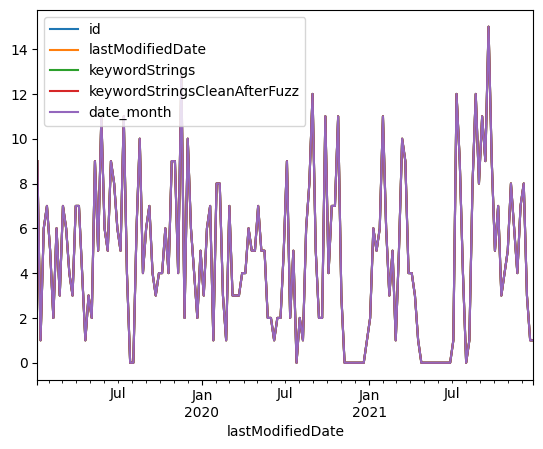

In [362]:
df_angela.lastModifiedDate= pd.to_datetime(df_angela['lastModifiedDate'])
df_angela.index = df_angela.lastModifiedDate
df_angela = df_angela.sort_index()
xx = df_angela.resample("7D").count()
xx.plot()

In [ ]:
df_angela.index = df_angela.index.astype(int)
df_angela = df_angela.sort_index()

In [ ]:
keywords = df['keywordStrings'].iloc[0]
df_test = pd.DataFrame({'keywords':keywords})
df_test['google_trends'] = df_test['keywords'].apply(get_interest_over_time, end_date=('2023-01-01'))

big_df = pd.concat([df_test.google_trends.iloc[i] for i in range(df_test.shape[0])])
big_df
# df_test.google_trends.iloc[0]
#TODO: not working well, fix it 

In [ ]:
all_weeks = [str(year)+str(week).zfill(2) for week in range(1, 53) for year in range(start_dt.year, end_dt.year)]

In [ ]:
sorted(all_weeks)

['201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '201913',
 '201914',
 '201915',
 '201916',
 '201917',
 '201918',
 '201919',
 '201920',
 '201921',
 '201922',
 '201923',
 '201924',
 '201925',
 '201926',
 '201927',
 '201928',
 '201929',
 '201930',
 '201931',
 '201932',
 '201933',
 '201934',
 '201935',
 '201936',
 '201937',
 '201938',
 '201939',
 '201940',
 '201941',
 '201942',
 '201943',
 '201944',
 '201945',
 '201946',
 '201947',
 '201948',
 '201949',
 '201950',
 '201951',
 '201952',
 '202001',
 '202002',
 '202003',
 '202004',
 '202005',
 '202006',
 '202007',
 '202008',
 '202009',
 '202010',
 '202011',
 '202012',
 '202013',
 '202014',
 '202015',
 '202016',
 '202017',
 '202018',
 '202019',
 '202020',
 '202021',
 '202022',
 '202023',
 '202024',
 '202025',
 '202026',
 '202027',
 '202028',
 '202029',
 '202030',
 '202031',
 '202032',
 '202033',
 '202034',
 '202035',
 '202036',
 '202037',
 '202038',
 '202039',

In [ ]:
df_angela.empty

False

In [325]:
def get_all_weeks(start_dt, end_dt):
    all_weeks = []
    start_dt = d.datetime.strptime(start_dt, '%Y-%m-%d') #just making sure
    end_dt = d.datetime.strptime(end_dt, '%Y-%m-%d')

    if end_dt.strftime("%Y") < start_dt.strftime("%Y"):
        print('End date should not be before start date. Please select different dates.')
        return -1
    
    elif end_dt.strftime("%Y") > start_dt.strftime("%Y"):
        #need to loop over years then weeks
        for year in range(int(start_dt.strftime("%Y")), int(end_dt.strftime("%Y"))+1):
            if year in [2006, 2012, 2017, 2023]:
                weeks = 53
            else:
                weeks = 52
            for week in range(1, weeks+1):
                all_weeks.append(str(year)+str(week).zfill(2))
        #now let's remove the ones before and after the required week
        all_weeks = np.asarray(sorted([int(i) for i in all_weeks]))
        mask = np.logical_and(all_weeks>=int(str(start_dt.strftime("%Y"))+str(start_dt.strftime("%W"))), 
                              all_weeks<int(str(end_dt.strftime("%Y"))+str(end_dt.strftime("%W"))))
        all_weeks = all_weeks[mask]
        return [str(i) for i in all_weeks]
    
    elif end_dt.strftime("%Y") == start_dt.strftime("%Y"):
        #we just need to loop over weeks 
        if int(start_dt.strftime("%Y")) in [2006, 2012, 2017, 2023]:
            weeks = 53
        else:
            weeks = 52
        for week in range(int(start_dt.strftime("%W")), int(end_dt.strftime("%W"))+1):
            all_weeks.append(str(start_dt.strftime("%Y"))+str(week).zfill(2))
        return all_weeks
    
    return sorted(all_weeks)

In [326]:
get_all_weeks('2019-01-01', '2019-06-01')


['201900',
 '201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '201913',
 '201914',
 '201915',
 '201916',
 '201917',
 '201918',
 '201919',
 '201920',
 '201921']

## FIGURING OUT HOW TO EFFECTIVELY PLOT DATES ON X-AXIS

In [383]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2019-01-01 2023-01-01')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')

In [421]:
angie_does_google

,Angela Merkel
date,
2019-01-06,9
2019-01-13,8
2019-01-20,11
2019-01-27,10
2019-02-03,10
...,...
2022-12-04,5
2022-12-11,5
2022-12-18,5


In [407]:

edges = list(angie_does_google.index) #extract time indices
edges.insert(0, '2019-01-01') #append the first one manually
edges = pd.to_datetime(edges,format= '%Y-%m-%d' ) # turn them all into pandas timestamps
edges

DatetimeIndex(['2019-01-01', '2019-01-06', '2019-01-13', '2019-01-20',
               '2019-01-27', '2019-02-03', '2019-02-10', '2019-02-17',
               '2019-02-24', '2019-03-03',
               ...
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01'],
              dtype='datetime64[ns]', length=210, freq=None)

In [387]:
# CAN wee then use these as edges to bin the dates of articles of dw?

In [392]:
# heree is an example of a dataframe we might get 
filepath = '/home/marios/S2DS/Spring23_DW/data/interim/clean_keywords_2019-2021_after_RapidFuzz.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer') #whole cleaned dataset

not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices) #dataset where we havee only rows where angeela in mentioned
df_angela['ts'] = pd.to_datetime(df_angela.lastModifiedDate,format= '%Y-%m-%d' )

dw_mentions = []
for i, (start, end) in enumerate(zip(edges[:-1], edges[1:])):
    mask = np.logical_and(df_angela.ts.dt.date >= start, df_angela.ts.dt.date<end)
    dw_mentions.append(np.sum(mask))

In [415]:
#there is the brute way of looping over all pairs of google timestamps, 
#finding which articles where published in that week and adding one for each article, like so...



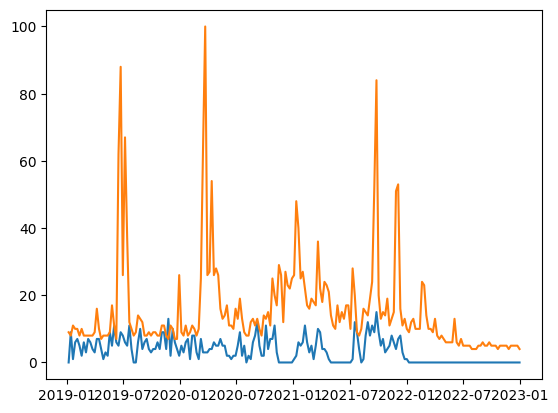

In [423]:
plt.plot(edges[1:], dw_mentions)
plt.plot(edges[1:], angie_does_google)

In [426]:
angie_does_google['dw_mentions'] = dw_mentions
angie_does_google

,Angela Merkel,dw_mentions
date,,
2019-01-06,9,0
2019-01-13,8,9
2019-01-20,11,1
2019-01-27,10,6
2019-02-03,10,7
...,...,...
2022-12-04,5,0
2022-12-11,5,0
2022-12-18,5,0


In [428]:
'Germany' in df['keywordStringsCleanAfterFuzz']

False

In [ ]:
df_clean = df_clean[keyword in df_clean['keywordStringsCleanAfterFuzz']]


In [ ]:
for row in enumerate(df_clean['keywordStringsCleanAfterFuzz']):
        if keyword not in row:
            df_clean.drop(row)

In [430]:
df['present'] = df['keywordStringsCleanAfterFuzz'].apply(lambda x:True if 'angela merkel' in x else False)
df.loc[df['present']]


In [436]:
df.present

0        False
1        False
2        False
3        False
4        False
         ...  
33825    False
33826    False
33827    False
33828    False
33829    False
Name: present, Length: 33830, dtype: bool

,id,lastModifiedDate,keywordStrings,keywordStringsCleanAfterFuzz,present
185,2019-01-06T13:54:57.402Z,2019-01-06T13:54:57.402Z,"[Germany, cyber, hacking, Angela Merkel, AfD]","[germany, cyber, hacking, angela merkel, afd]",True
213,2019-01-07T13:25:08.879Z,2019-01-07T13:25:08.879Z,"[Germany, data breach, cyber, hacking, Angela ...","[germany, data breach, cyber, hacking, angela ...",True
237,2019-01-08T08:38:56.012Z,2019-01-08T08:38:56.012Z,"[hacking, leak, politicians, media, Angela Mer...","[hacking, leak, politicians, media, angela mer...",True
305,2019-01-10T06:52:20.936Z,2019-01-10T06:52:20.936Z,"[Germany, Gerd Müller, German Federal Ministry...","[germany, gerd müller, zambia, malawi, namibia...",True
340,2019-01-10T18:55:05.477Z,2019-01-10T18:55:05.477Z,"[Christian Democratic Union, Friedrich Merz, A...","[christian democratic union, friedrich merz, a...",True
...,...,...,...,...,...
33340,2021-12-16T21:22:41.980Z,2021-12-16T21:22:41.980Z,"[Germany, arms exports, Angela Merkel, Egypt, ...","[germany, arms exports, angela merkel, egypt, ...",True
33372,2021-12-17T14:42:43.270Z,2021-12-17T14:42:43.270Z,"[Friedrich Merz, CDU, Angela Merkel]","[friedrich merz, cdu, angela merkel]",True
33384,2021-12-17T22:31:35.705Z,2021-12-17T22:31:35.705Z,"[CDU, Angela Merkel, Armin Laschet, Markus Söd...","[cdu, angela merkel, armin laschet, markus söd...",True
33618,2021-12-25T18:07:11.555Z,2021-12-25T18:07:11.555Z,"[coronavirus, COVID-19, COVID, pandemic, Frank...","[coronavirus, covid-19, covid, pandemic, frank...",True
